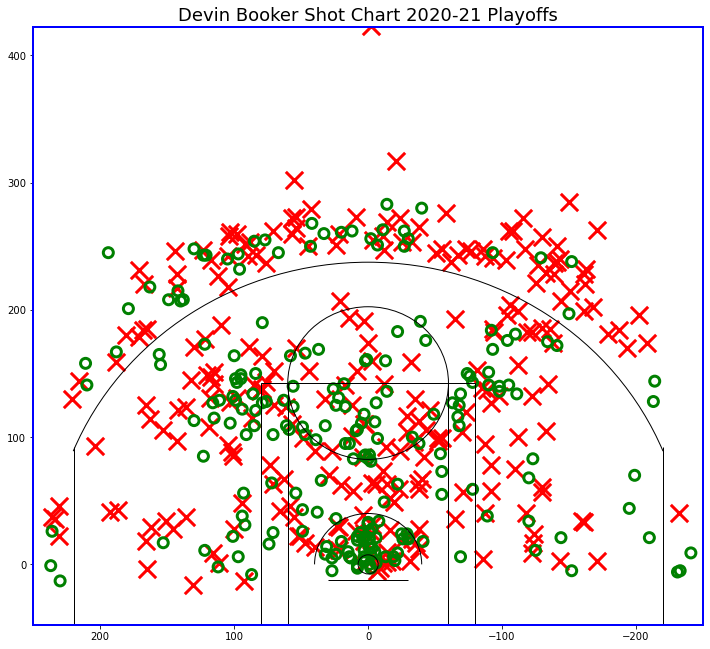

In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
from matplotlib.path import Path
from matplotlib.patches import PathPatch

from nba_api.stats.static import players
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import playercareerstats

def get_player_shotchartdetail(player_name, season_id):
    nba_players= players.get_players()
    player_dict=[player for player in nba_players if player['full_name'] == player_name][0]
    
    career = playercareerstats.PlayerCareerStats(player_id=player_dict['id'])
    career_df = career.get_data_frames()[0]
    
    team_id = career_df[career_df['SEASON_ID']==season_id]['TEAM_ID']
    
    shortchartlist=shotchartdetail.ShotChartDetail(team_id=int(team_id),
                                                   player_id=int(player_dict['id']),
                                                   season_type_all_star='Playoffs',
                                                   season_nullable=season_id,
                                                   context_measure_simple="FGA").get_data_frames()
    return shortchartlist[0], shortchartlist[1]

def draw_court(ax=None, color="black",lw=1, outer_lines=False):
   
    if ax is None:
        ax=plt.gca()
        
        hoop=Circle((0,0), radius=7.5, linewidth=lw, color=color, fill=False)
        
        backboard=Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)
        outer_box=Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
        inner_box=Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
        top_free_throw=Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color)
        bottom_free_throw=Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
        restricted=Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
        corner_three_a=Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
        corner_three_b=Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
        three_arc=Arc((0,0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)
        
        court_elements=[hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw, restricted, corner_three_a, corner_three_b, three_arc]
        
        if outer_lines:
            outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        
        for element in court_elements:
            ax.add_patch(element)
            
draw_court()
def shot_chart(data, title="", color="b", xlim=(-250,250), ylim=(422.5, -47.5), line_color="blue",
              court_color="white", court_lw=2, outer_lines=False,
              flip_court=False, gridsize=None,
              ax=None, despine=False):
    
    if ax is None:
        ax=plt.gca()
        
    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])
    
    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)
    
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)
            
    x_missed=data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_X']
    y_missed=data[data['EVENT_TYPE']=='Missed Shot']['LOC_Y']
    
    x_made=data[data['EVENT_TYPE']=='Made Shot']['LOC_X']
    y_made=data[data['EVENT_TYPE']=='Made Shot']['LOC_Y']
    
    ax.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3)
    ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker="o", s=100, linewidths=3)
    
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)
        
    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        
    return ax
if __name__ == "__main__":
    player_shotchart_df, league_avg=get_player_shotchartdetail("Devin Booker", "2020-21")
    shot_chart(player_shotchart_df, title="Devin Booker Shot Chart 2020-21 Playoffs")
    
    plt.rcParams['figure.figsize']=(12,11)
    plt.show
    
    xlim=(-250,250)
    ylim=(422.5,-47.5)
    
    ax=plt.gca()
    ax.set_xlim(xlim[::-1])
    ax.set_ylim(ylim[::-1])
    draw_court(ax)
    plt.show()